In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

from sklearn.model_selection import train_test_split

In [2]:
df_listings = pd.read_csv('chicago_listings.csv')
df_listings = df_listings[(df_listings.number_of_reviews>2) & (df_listings.number_of_reviews<=400)].reset_index(drop=True)

In [3]:
df_listings['price_num'] = [float(word[1:]) for word in df_listings.price]
df_listings.bedrooms.fillna(0, inplace=True)
df_listings.beds.fillna(0, inplace=True)

In [4]:
df_listings = df_listings[(df_listings.price_num<1000)].reset_index(drop=True)

In [5]:
bath_num_dict = {'1 bath':1, 
 '2 baths':2, 
 '6.5 baths':6.5, 
 '3 shared baths':3, 
 '2.5 baths':2.5,
 '1 private bath':1, 
 '1 shared bath':1, 
 '3 baths':3, 
 '2.5 shared baths':2.5,
 '3.5 baths':3.5,
 '1.5 baths':1.5,
 '4.5 baths':4.5,
 '2 shared baths':2,
 '1.5 shared baths':1.5,
 '5 baths':5,
 '4 baths':4,
 '11 shared baths':11,
 '11.5 shared baths':11.5,
 'Half-bath':0.5,
 '7 baths':7,
 '6 baths':6,
 '4 shared baths':4,
 'Private half-bath':0.5,
 '0 shared baths':0,
 'Shared half-bath':0.5,
 '0 baths':0,
 '8 shared baths':8,
 '5.5 baths':5.5
}
df_listings.bathrooms_text.fillna('0 baths', inplace=True)
df_listings['bathroom_num'] = df_listings.bathrooms_text.apply(lambda x: bath_num_dict[x])

In [6]:
df_listings

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price_num,bathroom_num
0,2384,https://www.airbnb.com/rooms/2384,20211215062239,2021-12-15,Hyde Park - Walk to University of Chicago,If you have proof of vaccination and can clim...,The apartment is less than one block from beau...,https://a0.muscache.com/pictures/9780bb37-fb54...,2613,https://www.airbnb.com/users/show/2613,Rebecca,2008-08-29,Chicago Illinois United States,My 2 bdrm apartment is a 2nd floor walk-up in ...,within an hour,100%,84%,t,https://a0.muscache.com/im/pictures/user/8bb47...,https://a0.muscache.com/im/pictures/user/8bb47...,Hyde Park,1.0,1.0,['email' 'phone' 'reviews' 'manual_offline' 'j...,t,t,Chicago Illinois United States,Hyde Park,NaN,41.787900,-87.587800,Private room in condominium (condo),Private room,1,NaN,1 shared bath,1.0,1.0,"[""Shampoo"" ""Cooking basics"" ""Hot water"" ""Iron""...",$95.00,3,89,3,3,1125,1125,3.0,1125.0,NaN,t,27,57,87,355,2021-12-15,192,11,0,2015-01-09,2021-11-07,4.99,4.98,4.99,4.98,4.98,4.95,4.94,R17000015609,f,1,0,1,0,2.27,95.0,1.0
1,10945,https://www.airbnb.com/rooms/10945,20211215062239,2021-12-15,The Biddle House (#1),Beautiful first floor apartment in Historic Ol...,NaN,https://a0.muscache.com/pictures/58d1a420-a24b...,33004,https://www.airbnb.com/users/show/33004,At Home Inn,2009-08-21,Chicago Illinois United States,Hi we're Bob and Liz Biddle long time Chicagoa...,within an hour,94%,94%,t,https://a0.muscache.com/im/pictures/user/e23d4...,https://a0.muscache.com/im/pictures/user/e23d4...,Old Town,7.0,7.0,['email' 'phone' 'reviews' 'jumio' 'government...,t,t,NaN,Lincoln Park,NaN,41.911960,-87.639810,Entire rental unit,Entire home/apt,4,NaN,1 bath,2.0,2.0,"[""Shampoo"" ""Cable TV"" ""Stove"" ""Cooking basics""...",$127.00,4,180,4,4,180,180,4.0,180.0,NaN,t,5,5,8,98,2021-12-15,39,18,0,2014-04-28,2021-11-14,4.59,4.67,4.74,4.77,4.72,4.97,4.56,2120297,t,8,8,0,0,0.42,127.0,1.0
2,12140,https://www.airbnb.com/rooms/12140,20211215062239,2021-12-15,Lincoln Park Guest House,Bed and Breakfast license issued by the City o...,The Guest House is in the heart of Chicago's m...,https://a0.muscache.com/pictures/55126/6a4f01b...,46734,https://www.airbnb.com/users/show/46734,Sharon And Robert,2009-10-18,Chicago Illinois United States,Best in the city with long-time urban-dwelling...,NaN,NaN,100%,f,https://a0.muscache.com/im/users/46734/profile...,https://a0.muscache.com/im/users/46734/profile...,Lincoln Park,1.0,1.0,['email' 'phone' 'facebook' 'reviews' 'kba'],t,t,Chicago Illinois United States,Lincoln Park,NaN,41.923570,-87.649470,Room in boutique hotel,Private room,2,NaN,1 private bath,1.0,2.0,"[""Shampoo"" ""Cable TV"" ""Hot water"" ""Iron"" ""Fire...",$329.00,2,7,2,2,7,7,2.0,7.0,NaN,t,29,59,89,179,

In [7]:
neigh_dummies = pd.get_dummies(df_listings.neighbourhood_cleansed)
neigh_dummies

,Albany Park,Archer Heights,Armour Square,Ashburn,Auburn Gresham,Austin,Avalon Park,Avondale,Belmont Cragin,Beverly,Bridgeport,Brighton Park,Burnside,Calumet Heights,Chatham,Chicago Lawn,Clearing,Douglas,Dunning,East Garfield Park,East Side,Edgewater,Edison Park,Englewood,Forest Glen,Fuller Park,Gage Park,Garfield Ridge,Grand Boulevard,Greater Grand Crossing,Hegewisch,Hermosa,Humboldt Park,Hyde Park,Irving Park,Jefferson Park,Kenwood,Lake View,Lincoln Park,Lincoln Square,Logan Square,Loop,Lower West Side,Mckinley Park,Montclare,Morgan Park,Mount Greenwood,Near North Side,Near South Side,Near West Side,New City,North Center,North Lawndale,North Park,Norwood Park,Oakland,Ohare,Portage Park,Pullman,Rogers Park,Roseland,South Chicago,South Deering,South Lawndale,South Shore,Uptown,Washington Heights,Washington Park,West Elsdon,West Englewood,West Garfield Park,West Lawn,West Pullman,West Ridge,West Town,Woodlawn
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4656,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4657,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4658,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4659,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [8]:
for neigh_name in neigh_dummies.columns:
    df_listings[neigh_name] = neigh_dummies[neigh_name]


In [9]:
#df_listings = pd.concat((df_listings, neigh_dummies), axis=0)

In [10]:
df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price_num,bathroom_num,Albany Park,Archer Heights,Armour Square,Ashburn,Auburn Gresham,Austin,Avalon Park,Avondale,Belmont Cragin,Beverly,Bridgeport,Brighton Park,Burnside,Calumet Heights,Chatham,Chicago Lawn,Clearing,Douglas,Dunning,East Garfield Park,East Side,Edgewater,Edison Park,Englewood,Forest Glen,Fuller Park,Gage Park,Garfield Ridge,Grand Boulevard,Greater Grand Crossing,Hegewisch,Hermosa,Humboldt Park,Hyde Park,Irving Park,Jefferson Park,Kenwood,Lake View,Lincoln Park,Lincoln Square,Logan Square,Loop,Lower West Side,Mckinley Park,Montclare,Morgan Park,Mount Greenwood,Near North Side,Near South Side,Near West Side,New City,North Center,North Lawndale,North Park,Norwood Park,Oakland,Ohare,Portage Park,Pullman,Rogers Park,Roseland,South Chicago,South Deering,South Lawndale,South Shore,Uptown,Washington Heights,Washington Park,West Elsdon,West Englewood,West Garfield Park,West Lawn,West Pullman,West Ridge,West Town,Woodlawn
0,2384,https://www.airbnb.com/rooms/2384,20211215062239,2021-12-15,Hyde Park - Walk to University of Chicago,If you have proof of vaccination and can clim...,The apartment is less than one block from beau...,https://a0.muscache.com/pictures/9780bb37-fb54...,2613,https://www.airbnb.com/users/show/2613,Rebecca,2008-08-29,Chicago Illinois United States,My 2 bdrm apartment is a 2nd floor walk-up in ...,within an hour,100%,84%,t,https://a0.muscache.com/im/pictures/user/8bb47...,https://a0.muscache.com/im/pictures/user/8bb47...,Hyde Park,1.0,1.0,['email' 'phone' 'reviews' 'manual_offline' 'j...,t,t,Chicago Illinois United States,Hyde Park,NaN,41.787900,-87.587800,Private room in condominium (condo),Private room,1,NaN,1 shared bath,1.0,1.0,"[""Shampoo"" ""Cooking basics"" ""Hot water"" ""Iron""...",$95.00,3,89,3,3,1125,1125,3.0,1125.0,NaN,t,27,57,87,355,2021-12-15,192,11,0,2015-01-09,2021-11-07,4.99,4.98,4.99,4.98,4.98,4.95,4.94,R17000015609,f,1,0,1,0,2.27,95.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,10945,https://www.airbnb.com/rooms/10945,20211215062239,2021-12-15,The Biddle House (#1),Beautiful first floor apartment in Historic Ol...,NaN,https://a0.muscache.com/pictures/58d1a420-a24b...,33004,https://www.airbnb.com/users/show/33004,At Home Inn,2009-08-21,Chicago Illinois United States,Hi we're Bob and Liz Biddle long time Chicagoa...,within an hour,94%,94%,t,https://a0.muscache.com/im/pictures/user/e23d4...,https://a0.muscache.com/im/pictures/user/e23d4...,Old Town,7.0,7.0,['email' 'phone' 'reviews' 'jumio' 'government...,t,t,NaN,Lincoln Park,NaN,41.911960,-87.639810,Entire rental unit,Entire home

In [11]:
df_reviews = pd.read_csv('chicago_reviews.csv')

In [12]:
df_summ = df_reviews.groupby('listing_id').comments.sum().reset_index()

In [13]:
df_comb = pd.merge(df_listings, df_summ, how='left', left_on='id', right_on='listing_id' )

In [14]:
df_comb.shape

(4661, 154)

In [15]:
df_comb.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price_num,bathroom_num,Albany Park,Archer Heights,Armour Square,Ashburn,Auburn Gresham,Austin,Avalon Park,Avondale,Belmont Cragin,Beverly,Bridgeport,Brighton Park,Burnside,Calumet Heights,Chatham,Chicago Lawn,Clearing,Douglas,Dunning,East Garfield Park,East Side,Edgewater,Edison Park,Englewood,Forest Glen,Fuller Park,Gage Park,Garfield Ridge,Grand Boulevard,Greater Grand Crossing,Hegewisch,Hermosa,Humboldt Park,Hyde Park,Irving Park,Jefferson Park,Kenwood,Lake View,Lincoln Park,Lincoln Square,Logan Square,Loop,Lower West Side,Mckinley Park,Montclare,Morgan Park,Mount Greenwood,Near North Side,Near South Side,Near West Side,New City,North Center,North Lawndale,North Park,Norwood Park,Oakland,Ohare,Portage Park,Pullman,Rogers Park,Roseland,South Chicago,South Deering,South Lawndale,South Shore,Uptown,Washington Heights,Washington Park,West Elsdon,West Englewood,West Garfield Park,West Lawn,West Pullman,West Ridge,West Town,Woodlawn,listing_id,comments
0,2384,https://www.airbnb.com/rooms/2384,20211215062239,2021-12-15,Hyde Park - Walk to University of Chicago,If you have proof of vaccination and can clim...,The apartment is less than one block from beau...,https://a0.muscache.com/pictures/9780bb37-fb54...,2613,https://www.airbnb.com/users/show/2613,Rebecca,2008-08-29,Chicago Illinois United States,My 2 bdrm apartment is a 2nd floor walk-up in ...,within an hour,100%,84%,t,https://a0.muscache.com/im/pictures/user/8bb47...,https://a0.muscache.com/im/pictures/user/8bb47...,Hyde Park,1.0,1.0,['email' 'phone' 'reviews' 'manual_offline' 'j...,t,t,Chicago Illinois United States,Hyde Park,NaN,41.787900,-87.587800,Private room in condominium (condo),Private room,1,NaN,1 shared bath,1.0,1.0,"[""Shampoo"" ""Cooking basics"" ""Hot water"" ""Iron""...",$95.00,3,89,3,3,1125,1125,3.0,1125.0,NaN,t,27,57,87,355,2021-12-15,192,11,0,2015-01-09,2021-11-07,4.99,4.98,4.99,4.98,4.98,4.95,4.94,R17000015609,f,1,0,1,0,2.27,95.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2384,it's a wonderful trip experience. I didn't exc...
1,10945,https://www.airbnb.com/rooms/10945,20211215062239,2021-12-15,The Biddle House (#1),Beautiful first floor apartment in Historic Ol...,NaN,https://a0.muscache.com/pictures/58d1a420-a24b...,33004,https://www.airbnb.com/users/show/33004,At Home Inn,2009-08-21,Chicago Illinois United States,Hi we're Bob and Liz Biddle long time Chicagoa...,within an hour,94%,94%,t,https://a0.muscache.com/im/pictures/user/e23d4...,https://a0.muscache.com/im/pictures/user/e23d4...,Old Town,7.0,7.0,['email' 'phone' 'reviews' 'jumio' 'government...,t

In [16]:
df_comb.tail()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price_num,bathroom_num,Albany Park,Archer Heights,Armour Square,Ashburn,Auburn Gresham,Austin,Avalon Park,Avondale,Belmont Cragin,Beverly,Bridgeport,Brighton Park,Burnside,Calumet Heights,Chatham,Chicago Lawn,Clearing,Douglas,Dunning,East Garfield Park,East Side,Edgewater,Edison Park,Englewood,Forest Glen,Fuller Park,Gage Park,Garfield Ridge,Grand Boulevard,Greater Grand Crossing,Hegewisch,Hermosa,Humboldt Park,Hyde Park,Irving Park,Jefferson Park,Kenwood,Lake View,Lincoln Park,Lincoln Square,Logan Square,Loop,Lower West Side,Mckinley Park,Montclare,Morgan Park,Mount Greenwood,Near North Side,Near South Side,Near West Side,New City,North Center,North Lawndale,North Park,Norwood Park,Oakland,Ohare,Portage Park,Pullman,Rogers Park,Roseland,South Chicago,South Deering,South Lawndale,South Shore,Uptown,Washington Heights,Washington Park,West Elsdon,West Englewood,West Garfield Park,West Lawn,West Pullman,West Ridge,West Town,Woodlawn,listing_id,comments
4656,53219746,https://www.airbnb.com/rooms/53219746,20211215062239,2021-12-15,Bright Furnished 2BR/2BTH Apt in Chicago,This fully gut-rehabbed garden unit features r...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,429410420,https://www.airbnb.com/users/show/429410420,Luap,2021-10-28,Chicago Illinois United States,NaN,within an hour,100%,68%,f,https://a0.muscache.com/im/pictures/user/33879...,https://a0.muscache.com/im/pictures/user/33879...,Lake View East,0.0,0.0,['email' 'phone'],t,t,NaN,Near West Side,NaN,41.882680,-87.668820,Entire rental unit,Entire home/apt,4,NaN,2 baths,2.0,2.0,"[""Shampoo"" ""Dryer \u2013\u00a0In unit"" ""Stove""...",$102.00,2,365,2,4,365,365,3.6,365.0,NaN,t,25,55,85,85,2021-12-15,3,3,3,2021-11-17,2021-11-27,4.67,5.00,5.00,5.00,5.00,5.00,4.67,R21000062395,f,9,9,0,0,3.00,102.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,53219746,Very clean great locationGreat place to stay!T...
4657,53239035,https://www.airbnb.com/rooms/53239035,20211215062239,2021-12-15,Amazing Downtown Chicago Penthouse.,This Downtown Chicago Penthouse will give you ...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,423752949,https://www.airbnb.com/users/show/423752949,Upscale,2021-09-19,Calumet City Illinois United States,NaN,within a few hours,90%,85%,f,https://a0.muscache.com/im/pictures/user/e469f...,https://a0.muscache.com/im/pictures/user/e469f...,West Loop,2.0,2.0,['email' 'phone'],t,t,NaN,Near North Side,NaN,41.891700,-87.620060,Entire condominium (condo),Entire home/apt,4,NaN,1 bath,1.0,1.0,"[""Pool"" ""Host greets you"" ""Kitchen"" ""Washer"" ""...",$120.00,1,112

In [17]:
from sklearn.utils import shuffle
df_comb = shuffle(df_comb,random_state=42).reset_index(drop=True)


In [18]:
for i,doc in enumerate(df_comb.comments):
    print(i, len(doc))

0 41773
1 5238
2 14510
3 30058
4 13887
5 1774
6 6317
7 7834
8 1508
9 31031
10 2242
11 20978
12 2064
13 2927
14 15022
15 9339
16 2901
17 7769
18 3120
19 11523
20 4964
21 5151
22 36935
23 9094
24 19757
25 33010
26 12834
27 103549
28 26764
29 3355
30 1563
31 30432
32 11844
33 2247
34 3986
35 894
36 41212
37 24934
38 4312
39 19495
40 73932
41 36808
42 3567
43 4052
44 4793
45 5539
46 9042
47 24570
48 2446
49 52593
50 27979
51 889
52 56617
53 3382
54 3901
55 4875
56 24788
57 20269
58 3797
59 16437
60 4774
61 58995
62 1801
63 5858
64 2112
65 32083
66 64245
67 10056
68 1268
69 26605
70 17976
71 1920
72 1466
73 7864
74 1948
75 13657
76 16737
77 34289
78 12020
79 7463
80 412
81 88088
82 5574
83 72453
84 12054
85 10278
86 30887
87 6389
88 3519
89 4527
90 17059
91 520
92 1512
93 10731
94 15212
95 55687
96 15454
97 4182
98 1505
99 12279
100 38882
101 10664
102 17442
103 19050
104 11057
105 2447
106 60806
107 12732
108 3121
109 10316
110 10157
111 4278
112 35726
113 6819
114 41766
115 4499
116 3684


In [19]:
df_comb.iloc[696:699,:]

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price_num,bathroom_num,Albany Park,Archer Heights,Armour Square,Ashburn,Auburn Gresham,Austin,Avalon Park,Avondale,Belmont Cragin,Beverly,Bridgeport,Brighton Park,Burnside,Calumet Heights,Chatham,Chicago Lawn,Clearing,Douglas,Dunning,East Garfield Park,East Side,Edgewater,Edison Park,Englewood,Forest Glen,Fuller Park,Gage Park,Garfield Ridge,Grand Boulevard,Greater Grand Crossing,Hegewisch,Hermosa,Humboldt Park,Hyde Park,Irving Park,Jefferson Park,Kenwood,Lake View,Lincoln Park,Lincoln Square,Logan Square,Loop,Lower West Side,Mckinley Park,Montclare,Morgan Park,Mount Greenwood,Near North Side,Near South Side,Near West Side,New City,North Center,North Lawndale,North Park,Norwood Park,Oakland,Ohare,Portage Park,Pullman,Rogers Park,Roseland,South Chicago,South Deering,South Lawndale,South Shore,Uptown,Washington Heights,Washington Park,West Elsdon,West Englewood,West Garfield Park,West Lawn,West Pullman,West Ridge,West Town,Woodlawn,listing_id,comments
696,49771548,https://www.airbnb.com/rooms/49771548,20211215062239,2021-12-15,West Loop is the Best Loop 3Bed Condo,Outstanding 3bedroom 2bath condo in the West L...,West Loop is filled with many Bars and Restaur...,https://a0.muscache.com/pictures/2fb41146-542d...,104523586,https://www.airbnb.com/users/show/104523586,Eric,2016-11-20,Bentonville Arkansas United States,Lover of the beach—sleeping on the beach snooz...,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/93539...,https://a0.muscache.com/im/pictures/user/93539...,NaN,2.0,2.0,['email' 'phone' 'facebook' 'offline_governmen...,t,t,Chicago Illinois United States,Near West Side,NaN,41.88333,-87.65282,Entire condominium (condo),Entire home/apt,7,NaN,2 baths,3.0,3.0,"[""Shampoo"" ""Stove"" ""Cooking basics"" ""Hot water...",$329.00,2,1125,2,2,1125,1125,2.0,1125.0,NaN,t,23,53,83,173,2021-12-15,22,22,2,2021-05-31,2021-11-28,4.95,4.95,5.00,4.95,5.00,5.00,4.86,R19000042303,t,1,1,0,0,3.32,329.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,49771548,very responsive and accomodating host. nice cl...
697,20454596,https://www.airbnb.com/rooms/20454596,20211215062239,2021-12-15,Perfect Northside loc. Wrigley!! Free St Parking!,Airbnb Member since May 2011!! . Very clean an...,WrigleyvilleLakeviewBoystownMontrose beachAnde...,https://a0.muscache.com/pictures/f10ce17a-998a...,648385,https://www.airbnb.com/users/show/648385,Jaime And Michael,2011-05-31,Chicago Illinois United States,MEMBERs SINCE 2011\n\nYoung Professionals who ...,NaN,NaN,NaN,t,https://a0.muscache.com/im/pictures/user/450e6...,https://a0.muscache.com/im/pictures/user/4

In [20]:
df_train = df_comb.iloc[:-1000,:].reset_index(drop=True)
df_test = df_comb.iloc[-1000:,:].reset_index(drop=True)

In [21]:
df_train.shape, df_test.shape

((3661, 154), (1000, 154))

In [22]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3661 entries, 0 to 3660
Columns: 154 entries, id to comments
dtypes: float64(21), int64(22), object(35), uint8(76)
memory usage: 2.4+ MB


In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD, NMF
from sklearn.preprocessing import Normalizer

In [24]:
host_name_list = df_listings.host_name.str.lower().unique()

In [25]:
'bill and ted'.split(' ') + 'bill and ted'.split(' ')

['bill', 'and', 'ted', 'bill', 'and', 'ted']

In [26]:
hn_list = []
for str1 in host_name_list:
    hn_list = hn_list + (str(str1).split(' '))

In [27]:
vectorizer = TfidfVectorizer(min_df = 20, max_df=1000, stop_words = hn_list)
count_mat_train = vectorizer.fit_transform(df_train.comments) 
count_mat_test = vectorizer.transform(df_test.comments) 

#Display the matrix as a dataframe
pd.DataFrame(count_mat_train.toarray(),  columns=vectorizer.get_feature_names_out()).head(10)

/usr/local/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['airbnb', 'dba', 'dia', 'email', 'fang', 'firoz', 'forrest', 'jer', 'johhnie', 'jw', 'meridith', 'mr', 'ms', 'mỹ', 'phương', 'rentals', 'shih', 'tenna', 'tonya'] not in stop_words.
  warnings.warn(


,00,00am,00pm,100,1000,10am,10great,10min,10mins,10pm,11,110,11am,11pm,12,13,14,150,15min,15mins,16,17,18,18th,19,19th,1am,1pm,1st,200,2017,2018,2019,2020,2021,20min,20mins,20th,21,21st,22,23,24,24hrs,25,26,27,28,290,2am,2br,2nd,30,300,30am,30min,30mins,30pm,30th,31,33,35,36,360,3am,3pm,3rd,40,400,40min,45,48,49,4am,4pm,4th,50,500,53rd,55,5am,5min,5mins,5pm,5th,60,606,65,66,6am,6ft,6pm,6th,70,72,75,77,78,7am,7pm,80,81,85,8am,8pm,90,90s,94,95,9am,9pm,a1,ab,abandoned,aber,ability,abnb,abode,abound,abroad,absolute,abundance,abundant,ac,accents,accept,acceptable,accepted,accepting,accesible,acceso,accessed,accessibility,accessing,accessories,accident,accidentally,accomadating,accommodate,accommodated,accommodates,accommodation,accommodative,accomodate,accomodated,accomodating,accomodation,accomodations,according,accordingly,account,accounts,accueil,accueillant,accueilli,accuracy,accurately,accused,accustomed,accès,acogedor,acogedora,acquainted,act,acted,action,active,actively,activities,activity,actual,actually,ad,add,added,adding,addison,addition,additional,additionally,additions,address,addressed,addresses,addressing,adds,además,adequate,adequately,adjacent,adjoining,adjust,adjustable,adjusted,adjusting,adjustment,adjustments,admire,admiring,admit,admittedly,adorable,adorably,adored,adresse,adult,adults,advance,advantage,adventure,adventures,adventuring,adventurous,advertise,advertisement,advertising,advice,advices,advise,advised,aeropuerto,aesthetic,aesthetically,aesthetics,affect,affected,afford,affordability,affordable,afforded,afraid,african,afternoon,afternoons,afterwards,againa,againamazing,againgood,againgreat,againi,againit,againnice,against,againthe,againthis,againvery,againwe,againwonderful,age,aged,...,voices,voiture,volume,volver,volvería,volveríamos,von,vor,votre,vous,vraiment,vs,waffles,wait,waited,waiting,wake,waking,walgreen,walgreens,walkability,walker,walkers,walks,walkup,walkway,wall,walls,walmart,wander,wandering,wanna,wanting,wants,war,wardrobe,ware,waren,warmed,warmer,warmest,warming,warmly,warmth,warn,warned,warning,wary,wash,washcloths,washed,washer,washing,washington,washroom,wasnt,waste,watch,watched,watching,waterfall,waterfront,watering,waters,wave,ways,weak,wealth,wear,wearing,weary,weather,web,webs,website,wedding,wednesday,wee,weed,weekday,weekdays,weekends,weeklong,weekly,weeks,weight,weird,welcomed,welcomes,wells,wenn,werden,weren,west,western,wet,wfh,whatever,whatsoever,wheel,whenever,wherever,whether,whilst,whimsical,whirlpool,whistle,whistles,white,whoever,wholefoods,wholeheartedly,whom,whose,why,wi,wicker,wide,wie,wieder,wife,wild,willing,willingness,willis,win,wind,winding,window,windows,windy,wine,winner,winning,winter,wipe,wiped,wipes,wir,wireless,wirklich,wise,wish,wished,wishes,wishing,wobbly,wohl,wohnung,woke,woken,woman,women,won,wonder,wonderfull,wonderfully,wondering,wont,wood,wooden,woodwork,word,words,wore,workable,worker,workers,workout,works,workshop,workspace,world,worlds,worn,worried,worries,worry,worrying,worse,worst,worthwhile,worthy,wouldn,wouldnt,wound,wow,wrap,wrapped,wriggly,wright,write,writing,written,wrong,wrote,würden,ya,yard,yards,yeah,year,years,yelling,yellow,yes,yet,yo,yoga,yogurt,yolk,york,yougreat,young,younger,youre,yours,yourself,youthe,youtube,yr,yum,yummy,zeit,zentrum,zero,zimmer,zip,zona,zone,zoo,zoom,zu,zum,zur,zwei,également,équipé,équipée,était,étions,été,être,ótima,único,über,все,на,очень,너무
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.030578,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.040634,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.015561,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.158241,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0000

## Dimension Reduction / Feature Extraction

In [28]:
## Again, we do a fit_transform here.  This does two things:
## 1) It learns a mapping from a vector of words to a vector of "topics" or "reduced dimensions"
## 2) It applies that transformation to the count_mat and puts the result in reduced_mat

lsa = TruncatedSVD(50)
reduced_mat_train = lsa.fit_transform(count_mat_train)
reduced_mat_test = lsa.transform(count_mat_test)

In [29]:
## This fit_transform is very simple.  It calculates the sum of squares for each row (the "fit" part) and 
## then divides each row by that amount (the "transform" part).  This just ensures that each vector has a "norm" of 1
## Vectors with a norm of 1 are easy to work with for calculating similarity.

reduced_mat_train = Normalizer(copy=False).fit_transform(reduced_mat_train)
reduced_mat_test = Normalizer(copy=False).fit_transform(reduced_mat_test)

In [30]:
count_mat_train.shape, reduced_mat_train.shape #reduced_mat is the "Tall and Skinny" matrix T

((3661, 6154), (3661, 50))

In [31]:
count_mat_test.shape, reduced_mat_test.shape 

((1000, 6154), (1000, 50))

In [32]:
lsa.components_.shape #lsa.components is the "Short and Wide" matrix W

(50, 6154)

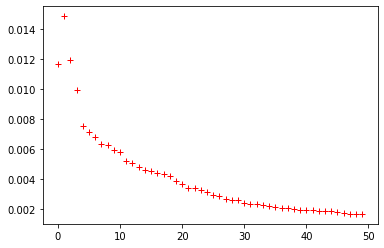

In [33]:
# This is (essentially) or eigenvalue plot (divided by the sum of eigenvalues).

plt.plot(lsa.explained_variance_ratio_,'r+')

In [34]:
pd.DataFrame(reduced_mat_test)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,0.367244,0.666664,0.255464,0.129444,-0.067341,0.003572,0.007662,-0.000756,-0.041773,-0.002861,-0.037401,0.084177,0.016255,0.017824,0.009581,-0.113128,-0.151378,-0.058362,0.050806,-0.056404,-0.001586,-0.151604,0.020011,0.126867,0.258938,-0.141832,0.161618,0.096511,-0.025978,0.058471,-0.053952,0.017515,0.032208,0.066639,0.080259,-0.020383,0.037098,0.048751,0.074590,0.089565,-0.049719,0.100276,-0.053696,0.061493,0.033495,-0.021318,-0.002954,0.235302,0.045843,-0.030977
1,0.608232,0.029407,-0.016054,-0.170927,-0.019232,0.049268,0.061760,-0.020156,-0.054434,-0.049806,0.017573,0.006074,0.018190,-0.045914,0.002884,-0.031410,0.006442,0.037366,0.000131,0.089030,0.071157,0.001819,-0.126893,-0.002683,0.165280,0.024896,0.081786,0.138073,-0.142412,0.157801,-0.181727,0.131687,0.038351,0.003202,-0.006921,0.075821,0.060756,0.386844,0.072206,0.144195,0.047686,0.289271,-0.126606,-0.013440,0.132370,-0.116264,-0.071630,0.271245,0.071859,-0.001889
2,0.296748,0.011984,0.017622,-0.077869,-0.300296,-0.056925,-0.404942,-0.151649,0.163676,0.522482,-0.029090,0.058628,-0.149987,0.389819,0.079171,0.105675,0.123887,0.124109,0.069082,0.012753,-0.095157,0.123829,-0.090752,-0.115291,0.109139,0.060619,-0.008167,0.010601,0.016967,-0.067880,-0.032520,-0.044114,-0.039181,0.002392,0.004031,0.004828,0.033810,-0.037522,-0.003822,-0.019246,-0.007017,0.080684,-0.012633,0.006436,0.040331,0.019025,-0.032242,-0.090231,0.021745,0.029872
3,0.067141,0.020196,0.008556,-0.024845,0.047064,-0.043141,-0.111006,0.658759,0.657569,-0.194898,-0.184386,-0.082823,-0.029195,0.080757,-0.039417,0.011693,-0.018173,0.024135,-0.049375,0.053618,-0.065642,0.051557,0.002733,0.051022,-0.031175,0.015343,0.024691,0.015463,0.014510,0.036426,-0.033222,0.000232,0.022361,0.004201,0.015167,0.012143,0.006466,-0.015367,-0.005289,-0.014117,0.010402,-0.017431,-0.012141,-0.012235,-0.004446,0.001110,-0.028180,0.003716,0.007527,0.015236
4,0.748922,-0.102095,0.069504,-0.318013,0.266639,-0.092147,0.012341,-0.027119,-0.137048,-0.009512,0.055891,-0.055735,-0.024109,0.154782,-0.110121,-0.013534,-0.015663,-0.017903,-0.098146,0.060500,-0.141402,-0.014374,-0.136974,0.002623,0.002643,0.015831,0.044039,0.233561,-0.066845,0.008173,-0.053523,0.009011,0.044735,0.043107,-0.004202,-0.052246,-0.074936,-0.099234,-0.041598,0.028104,0.010034,-0.086034,0.088051,-0.048899,-0.094187,-0.054442,0.033502,0.020046,-0.062175,0.061525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.568940,0.074923,-0.176652,0.076145,-0.419492,0.029482,0.030387,0.108078,-0.043085,-0.033578,-0.055154,0.081719,0.078099,-0.116967,0.072352,-0.044895,0.042402,0.056938,-0.061281,0.054761,0.166892,-0.048868,-0.093230,-0.089763,0.172727,-0.002726,-0.132111,-0.157238,0.147704,-0.200346,-0.109175,0.085981,0.136053,0.059419,-0.072250,0.179179,0.048060,0.034823,-0.086699,-0.160112,0.138128,-0.024721,-0.129374,-0.042428,-0.033589,0.071863,0.126312,-0.176612,-0.038851,-0.056745
996,0.646201,-0.091150,-0.101381,-0.058061,0.339303,0.047239,-0.096952,0.096132,-0.011067,0.069673,0.067429,-0.012053,0.125983,0.057641,-0.082278,-0.036707,0.050303,-0.005416,-0.068051,-0.008084,0.343011,0.038092,-0.007536,-0.132165,0.042722,-0.082571,0.048268,0.160165,0.256646,0.119277,0.118579,-0.176801,-0.043020,0.001283,-0.053154,-0.007100,-0.073570,0.005433,-0.054423,-0.074584,-0.078635,-0.010118,-0.068841,0.040630,0.053384,0.097681,-0.095644,-0.012945,0.109204,-0.128674
997,0.308661,0.692254,0.270626,0.180635,-0.033211,-0.009367,0.003109,0.038774,-0.037486,0.080471,-0.013489,-0.041748,0.215054,-0.048952,-0.102269,0.044299,-0.052348,-0.024064,0.024229,-0.123721,-0.114969,-0.179566,0.091486,0.108784,0.226316,-0.222595,0.123322,-0.029594,-0.042669,0.066946,-0.010629,0.016736,-0.042074,0.04245

## Explore the most important words in each topic / dimension

In [35]:
## This just gives us the column names of our terms.
terms = np.array(vectorizer.get_feature_names_out())

In [36]:
## This is a simple convenience function which gets the highest valued terms for each topic

def get_topical_terms(topic_mat, topic_num, term_vec, num_terms=25):
    return term_vec[np.argsort(-topic_mat[topic_num,:])][:num_terms]

In [37]:
## Print the highest valued terms for each of the first 10 topics

for i in range(50):
    print("topic {}".format(i))
    print(get_topical_terms(lsa.components_,i,terms, 35))

topic 0
['view' 'square' 'logan' 'lincoln' 'lake' 'wicker' 'basement' 'la'
 'snacks' 'studio' 'field' 'garage' 'dog' 'him' 'views' 'recommendations'
 'upstairs' 'muy' 'kids' 'bathrooms' 'loud' 'stairs' 'charming' 'loft'
 'tips' 'brown' 'neighbors' 'beautifully' 'appointed' 'husband' 'deck'
 'en' 'airport' 'gorgeous' 'bar']
topic 1
['view' 'views' 'rooftop' 'lake' 'staff' 'michigan' 'pool' 'balcony'
 'skyline' 'roof' 'deck' 'gym' 'pier' 'navy' 'desk' 'breathtaking'
 'service' 'magnificent' 'lobby' 'windows' 'team' 'stunning' 'millennium'
 'spectacular' 'sunrise' 'grant' 'penthouse' 'elevator' 'studio' 'mile'
 'mccormick' 'museum' 'foods' 'ave' 'hyde']
topic 2
['logan' 'square' 'view' 'views' 'rooftop' 'lincoln' 'studio' '606' 'deck'
 'balcony' 'roof' 'lake' 'skyline' 'wicker' 'pool' 'gorgeous' 'garage'
 'beautifully' 'appointed' 'staff' 'california' 'loft' 'trail' 'bucktown'
 'milwaukee' 'stunning' 'michigan' 'hip' 'parks' 'outdoor' 'breathtaking'
 'wine' 'designed' 'cafes' 'ave']
topic

In [38]:
df_train.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price_num,bathroom_num,Albany Park,Archer Heights,Armour Square,Ashburn,Auburn Gresham,Austin,Avalon Park,Avondale,Belmont Cragin,Beverly,Bridgeport,Brighton Park,Burnside,Calumet Heights,Chatham,Chicago Lawn,Clearing,Douglas,Dunning,East Garfield Park,East Side,Edgewater,Edison Park,Englewood,Forest Glen,Fuller Park,Gage Park,Garfield Ridge,Grand Boulevard,Greater Grand Crossing,Hegewisch,Hermosa,Humboldt Park,Hyde Park,Irving Park,Jefferson Park,Kenwood,Lake View,Lincoln Park,Lincoln Square,Logan Square,Loop,Lower West Side,Mckinley Park,Montclare,Morgan Park,Mount Greenwood,Near North Side,Near South Side,Near West Side,New City,North Center,North Lawndale,North Park,Norwood Park,Oakland,Ohare,Portage Park,Pullman,Rogers Park,Roseland,South Chicago,South Deering,South Lawndale,South Shore,Uptown,Washington Heights,Washington Park,West Elsdon,West Englewood,West Garfield Park,West Lawn,West Pullman,West Ridge,West Town,Woodlawn,listing_id,comments
0,20543019,https://www.airbnb.com/rooms/20543019,20211215062239,2021-12-15,Explore Hip Logan Square from a Modern Apartment,Stretch out on a plush sectional sofa in the l...,The apartment is located in the safe trendy Lo...,https://a0.muscache.com/pictures/b0894059-3795...,2069798,https://www.airbnb.com/users/show/2069798,Afsha,2012-04-04,Chicago Illinois United States,Interior Designer.\nAirBNB Superhost.\nLove to...,NaN,NaN,NaN,t,https://a0.muscache.com/im/pictures/user/df82f...,https://a0.muscache.com/im/pictures/user/df82f...,Logan Square,6.0,6.0,['email' 'phone' 'google' 'reviews' 'jumio' 'o...,t,t,Chicago Illinois United States,Logan Square,NaN,41.91451,-87.71061,Entire rental unit,Entire home/apt,5,NaN,1 bath,3.0,3.0,"[""Self check-in"" ""Pets allowed"" ""Iron"" ""Fire e...",$114.00,1,30,2,5,1125,1125,4.7,1125.0,NaN,t,0,23,53,53,2021-12-15,177,32,0,2017-08-26,2021-10-08,4.94,4.97,4.92,5.00,5.00,4.65,4.93,R20000054738,f,6,6,0,0,3.38,114.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20543019,Afsha is the BEST Airbnb host we've ever exper...
1,27016482,https://www.airbnb.com/rooms/27016482,20211215062239,2021-12-15,Rooftop views next to everything,Hi I'm Justin and I love Chicago and helping v...,My exact location is pretty unique in that the...,https://a0.muscache.com/pictures/67fe0f9f-413d...,52012721,https://www.airbnb.com/users/show/52012721,Justin,2015-12-22,Chicago Illinois United States,NaN,NaN,NaN,71%,f,https://a0.muscache.com/im/pictures/user/0eff8...,https://a0.muscache.com/im/pictures/user/0eff8...,West Town/Noble Square,1.0,1.0,['email' 'phone' 'reviews' 'jumio' '

In [39]:
reduced_mat_train_df = pd.DataFrame(reduced_mat_train)#, columns=['comment_feat_'+str(i) for i in range(50)])
reduced_mat_test_df = pd.DataFrame(reduced_mat_test)#, columns=['comment_feat_'+str(i) for i in range(50)])

In [40]:
reduced_mat_test_df.head(30)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,0.367244,0.666664,0.255464,0.129444,-0.067341,0.003572,0.007662,-0.000756,-0.041773,-0.002861,-0.037401,0.084177,0.016255,0.017824,0.009581,-0.113128,-0.151378,-0.058362,0.050806,-0.056404,-0.001586,-0.151604,0.020011,0.126867,0.258938,-0.141832,0.161618,0.096511,-0.025978,0.058471,-0.053952,0.017515,0.032208,0.066639,0.080259,-0.020383,0.037098,0.048751,0.074590,0.089565,-0.049719,0.100276,-0.053696,0.061493,0.033495,-0.021318,-0.002954,0.235302,0.045843,-0.030977
1,0.608232,0.029407,-0.016054,-0.170927,-0.019232,0.049268,0.061760,-0.020156,-0.054434,-0.049806,0.017573,0.006074,0.018190,-0.045914,0.002884,-0.031410,0.006442,0.037366,0.000131,0.089030,0.071157,0.001819,-0.126893,-0.002683,0.165280,0.024896,0.081786,0.138073,-0.142412,0.157801,-0.181727,0.131687,0.038351,0.003202,-0.006921,0.075821,0.060756,0.386844,0.072206,0.144195,0.047686,0.289271,-0.126606,-0.013440,0.132370,-0.116264,-0.071630,0.271245,0.071859,-0.001889
2,0.296748,0.011984,0.017622,-0.077869,-0.300296,-0.056925,-0.404942,-0.151649,0.163676,0.522482,-0.029090,0.058628,-0.149987,0.389819,0.079171,0.105675,0.123887,0.124109,0.069082,0.012753,-0.095157,0.123829,-0.090752,-0.115291,0.109139,0.060619,-0.008167,0.010601,0.016967,-0.067880,-0.032520,-0.044114,-0.039181,0.002392,0.004031,0.004828,0.033810,-0.037522,-0.003822,-0.019246,-0.007017,0.080684,-0.012633,0.006436,0.040331,0.019025,-0.032242,-0.090231,0.021745,0.029872
3,0.067141,0.020196,0.008556,-0.024845,0.047064,-0.043141,-0.111006,0.658759,0.657569,-0.194898,-0.184386,-0.082823,-0.029195,0.080757,-0.039417,0.011693,-0.018173,0.024135,-0.049375,0.053618,-0.065642,0.051557,0.002733,0.051022,-0.031175,0.015343,0.024691,0.015463,0.014510,0.036426,-0.033222,0.000232,0.022361,0.004201,0.015167,0.012143,0.006466,-0.015367,-0.005289,-0.014117,0.010402,-0.017431,-0.012141,-0.012235,-0.004446,0.001110,-0.028180,0.003716,0.007527,0.015236
4,0.748922,-0.102095,0.069504,-0.318013,0.266639,-0.092147,0.012341,-0.027119,-0.137048,-0.009512,0.055891,-0.055735,-0.024109,0.154782,-0.110121,-0.013534,-0.015663,-0.017903,-0.098146,0.060500,-0.141402,-0.014374,-0.136974,0.002623,0.002643,0.015831,0.044039,0.233561,-0.066845,0.008173,-0.053523,0.009011,0.044735,0.043107,-0.004202,-0.052246,-0.074936,-0.099234,-0.041598,0.028104,0.010034,-0.086034,0.088051,-0.048899,-0.094187,-0.054442,0.033502,0.020046,-0.062175,0.061525
5,0.325357,0.002416,-0.007095,-0.108749,-0.181730,0.017743,0.123355,0.038020,-0.079608,-0.249022,-0.051185,-0.167664,-0.054389,0.462308,0.217079,0.192267,0.046534,-0.308471,0.280146,-0.272661,0.149998,-0.260924,0.139195,0.125309,-0.137743,0.061550,-0.062860,0.002081,0.114973,-0.007079,0.061043,0.003677,0.012086,0.006974,0.011716,0.026540,0.011016,0.008725,-0.003704,-0.079256,0.019944,0.023004,0.026163,0.015424,-0.008738,-0.013880,0.017290,0.024613,-0.027956,0.039208
6,0.361821,0.538143,0.205768,0.033950,0.054018,-0.132244,-0.104896,0.025246,-0.093009,0.054720,-0.022593,0.064152,-0.038155,0.047955,-0.013751,-0.107216,-0.280132,-0.206032,-0.041895,0.041677,0.056876,0.008478,-0.110579,0.001555,-0.124329,-0.451474,0.109754,-0.104001,0.006741,0.008908,0.047894,0.089424,-0.131376,0.067776,-0.078897,-0.047287,-0.022730,0.075341,-0.050268,-0.026956,0.086134,-0.075510,0.005613,0.021032,-0.062800,0.101521,-0.040809,-0.034732,0.013780,0.095155
7,0.753426,0.054402,-0.224214,0.190473,0.079791,-0.158229,0.001114,-0.111865,-0.046534,-0.000066,-0.006651,-0.187615,-0.032621,0.128401,-0.070766,0.001740,-0.168773,-0.109974,-0.128466,0.240999,0.040250,0.122228,-0.100909,-0.005414,-0.136141,-0.041470,-0.052173,0.077404,-0.095334,0.005638,-0.006663,0.124216,0.015320,-0.098572,-0.020182,-0.066428,-0.006162,0.089965,0.046115,0.005830,-0.060562,-0.077801,0.043532,0.028634,-0.021634,0.012704,0.021854,0.025987,0.056881,-0.030596
8,0.638009,0.039206,0.050997,-0.292497,0.286527,-0.004043,-0.031

In [41]:
col_list = ['comment_feat_'+str(i) for i in range(50)]
reduced_mat_train_df.columns=col_list
reduced_mat_test_df.columns=col_list


In [42]:
df_test.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price_num,bathroom_num,Albany Park,Archer Heights,Armour Square,Ashburn,Auburn Gresham,Austin,Avalon Park,Avondale,Belmont Cragin,Beverly,Bridgeport,Brighton Park,Burnside,Calumet Heights,Chatham,Chicago Lawn,Clearing,Douglas,Dunning,East Garfield Park,East Side,Edgewater,Edison Park,Englewood,Forest Glen,Fuller Park,Gage Park,Garfield Ridge,Grand Boulevard,Greater Grand Crossing,Hegewisch,Hermosa,Humboldt Park,Hyde Park,Irving Park,Jefferson Park,Kenwood,Lake View,Lincoln Park,Lincoln Square,Logan Square,Loop,Lower West Side,Mckinley Park,Montclare,Morgan Park,Mount Greenwood,Near North Side,Near South Side,Near West Side,New City,North Center,North Lawndale,North Park,Norwood Park,Oakland,Ohare,Portage Park,Pullman,Rogers Park,Roseland,South Chicago,South Deering,South Lawndale,South Shore,Uptown,Washington Heights,Washington Park,West Elsdon,West Englewood,West Garfield Park,West Lawn,West Pullman,West Ridge,West Town,Woodlawn,listing_id,comments
0,43480448,https://www.airbnb.com/rooms/43480448,20211215062239,2021-12-15,Steps to MI Ave Shops | View Beach Gym | Zencity,This studio packs a powerful punch with glorio...,Near North is the center of Chicago activity: ...,https://a0.muscache.com/pictures/91655f71-cf87...,47172572,https://www.airbnb.com/users/show/47172572,Zencity,2015-10-22,Chicago Illinois United States,IMAGINE THE PERFECT SPACE IN THE PERFECT PLACE...,within an hour,98%,94%,f,https://a0.muscache.com/im/pictures/user/79d55...,https://a0.muscache.com/im/pictures/user/79d55...,Bucktown,62.0,62.0,['email' 'phone' 'reviews' 'jumio' 'offline_go...,t,t,Chicago Illinois United States,Near North Side,NaN,41.89937,-87.62719,Entire rental unit,Entire home/apt,3,NaN,1 bath,0.0,2.0,"[""Shampoo"" ""Cable TV"" ""Stove"" ""Cooking basics""...",$97.00,5,1125,5,7,1125,1125,6.4,1125.0,NaN,t,0,0,0,0,2021-12-15,72,35,0,2020-05-25,2021-09-25,4.75,4.85,4.61,4.76,4.68,4.96,4.69,City registration pending,f,62,62,0,0,3.79,97.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,43480448,A beautiful apartment with lots of potential o...
1,42181422,https://www.airbnb.com/rooms/42181422,20211215062239,2021-12-15,Heart of Lakeview - 2 bedrooms,Guests stay in two adjacent spacious bedrooms ...,Wide variety of restaurants (Swedish-American ...,https://a0.muscache.com/pictures/pro_photo_too...,48345036,https://www.airbnb.com/users/show/48345036,Richard,2015-11-06,Chicago Illinois United States,I am a pediatrician in my 70s as is my wife. W...,within an hour,100%,100%,f,https://a0.muscache.com/im/pictures/user/a8d38...,https://a0.muscache.com/im/pict

In [43]:
reduced_mat_test_df.head()

,comment_feat_0,comment_feat_1,comment_feat_2,comment_feat_3,comment_feat_4,comment_feat_5,comment_feat_6,comment_feat_7,comment_feat_8,comment_feat_9,comment_feat_10,comment_feat_11,comment_feat_12,comment_feat_13,comment_feat_14,comment_feat_15,comment_feat_16,comment_feat_17,comment_feat_18,comment_feat_19,comment_feat_20,comment_feat_21,comment_feat_22,comment_feat_23,comment_feat_24,comment_feat_25,comment_feat_26,comment_feat_27,comment_feat_28,comment_feat_29,comment_feat_30,comment_feat_31,comment_feat_32,comment_feat_33,comment_feat_34,comment_feat_35,comment_feat_36,comment_feat_37,comment_feat_38,comment_feat_39,comment_feat_40,comment_feat_41,comment_feat_42,comment_feat_43,comment_feat_44,comment_feat_45,comment_feat_46,comment_feat_47,comment_feat_48,comment_feat_49
0,0.367244,0.666664,0.255464,0.129444,-0.067341,0.003572,0.007662,-0.000756,-0.041773,-0.002861,-0.037401,0.084177,0.016255,0.017824,0.009581,-0.113128,-0.151378,-0.058362,0.050806,-0.056404,-0.001586,-0.151604,0.020011,0.126867,0.258938,-0.141832,0.161618,0.096511,-0.025978,0.058471,-0.053952,0.017515,0.032208,0.066639,0.080259,-0.020383,0.037098,0.048751,0.074590,0.089565,-0.049719,0.100276,-0.053696,0.061493,0.033495,-0.021318,-0.002954,0.235302,0.045843,-0.030977
1,0.608232,0.029407,-0.016054,-0.170927,-0.019232,0.049268,0.061760,-0.020156,-0.054434,-0.049806,0.017573,0.006074,0.018190,-0.045914,0.002884,-0.031410,0.006442,0.037366,0.000131,0.089030,0.071157,0.001819,-0.126893,-0.002683,0.165280,0.024896,0.081786,0.138073,-0.142412,0.157801,-0.181727,0.131687,0.038351,0.003202,-0.006921,0.075821,0.060756,0.386844,0.072206,0.144195,0.047686,0.289271,-0.126606,-0.013440,0.132370,-0.116264,-0.071630,0.271245,0.071859,-0.001889
2,0.296748,0.011984,0.017622,-0.077869,-0.300296,-0.056925,-0.404942,-0.151649,0.163676,0.522482,-0.029090,0.058628,-0.149987,0.389819,0.079171,0.105675,0.123887,0.124109,0.069082,0.012753,-0.095157,0.123829,-0.090752,-0.115291,0.109139,0.060619,-0.008167,0.010601,0.016967,-0.067880,-0.032520,-0.044114,-0.039181,0.002392,0.004031,0.004828,0.033810,-0.037522,-0.003822,-0.019246,-0.007017,0.080684,-0.012633,0.006436,0.040331,0.019025,-0.032242,-0.090231,0.021745,0.029872
3,0.067141,0.020196,0.008556,-0.024845,0.047064,-0.043141,-0.111006,0.658759,0.657569,-0.194898,-0.184386,-0.082823,-0.029195,0.080757,-0.039417,0.011693,-0.018173,0.024135,-0.049375,0.053618,-0.065642,0.051557,0.002733,0.051022,-0.031175,0.015343,0.024691,0.015463,0.014510,0.036426,-0.033222,0.000232,0.022361,0.004201,0.015167,0.012143,0.006466,-0.015367,-0.005289,-0.014117,0.010402,-0.017431,-0.012141,-0.012235,-0.004446,0.001110,-0.028180,0.003716,0.007527,0.015236
4,0.748922,-0.102095,0.069504,-0.318013,0.266639,-0.092147,0.012341,-0.027119,-0.137048,-0.009512,0.055891,-0.055735,-0.024109,0.154782,-0.110121,-0.013534,-0.015663,-0.017903,-0.098146,0.060500,-0.141402,-0.014374,-0.136974,0.002623,0.002643,0.015831,0.044039,0.233561,-0.066845,0.008173,-0.053523,0.009011,0.044735,0.043107,-0.004202,-0.052246,-0.074936,-0.099234,-0.041598,0.028104,0.010034,-0.086034,0.088051,-0.048899,-0.094187,-0.054442,0.033502,0.020046,-0.062175,0.061525


In [44]:
df_train_aug = pd.concat((df_train, reduced_mat_train_df),axis=1)

In [45]:
df_train_aug.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price_num,bathroom_num,Albany Park,Archer Heights,Armour Square,Ashburn,Auburn Gresham,Austin,Avalon Park,Avondale,Belmont Cragin,Beverly,Bridgeport,Brighton Park,Burnside,Calumet Heights,Chatham,Chicago Lawn,Clearing,Douglas,Dunning,East Garfield Park,East Side,Edgewater,Edison Park,Englewood,Forest Glen,Fuller Park,Gage Park,Garfield Ridge,Grand Boulevard,Greater Grand Crossing,Hegewisch,Hermosa,Humboldt Park,Hyde Park,Irving Park,Jefferson Park,Kenwood,Lake View,Lincoln Park,Lincoln Square,Logan Square,Loop,Lower West Side,Mckinley Park,Montclare,Morgan Park,Mount Greenwood,Near North Side,Near South Side,Near West Side,New City,North Center,North Lawndale,North Park,Norwood Park,Oakland,Ohare,Portage Park,Pullman,Rogers Park,Roseland,South Chicago,South Deering,South Lawndale,South Shore,Uptown,Washington Heights,Washington Park,West Elsdon,West Englewood,West Garfield Park,West Lawn,West Pullman,West Ridge,West Town,Woodlawn,listing_id,comments,comment_feat_0,comment_feat_1,comment_feat_2,comment_feat_3,comment_feat_4,comment_feat_5,comment_feat_6,comment_feat_7,comment_feat_8,comment_feat_9,comment_feat_10,comment_feat_11,comment_feat_12,comment_feat_13,comment_feat_14,comment_feat_15,comment_feat_16,comment_feat_17,comment_feat_18,comment_feat_19,comment_feat_20,comment_feat_21,comment_feat_22,comment_feat_23,comment_feat_24,comment_feat_25,comment_feat_26,comment_feat_27,comment_feat_28,comment_feat_29,comment_feat_30,comment_feat_31,comment_feat_32,comment_feat_33,comment_feat_34,comment_feat_35,comment_feat_36,comment_feat_37,comment_feat_38,comment_feat_39,comment_feat_40,comment_feat_41,comment_feat_42,comment_feat_43,comment_feat_44,comment_feat_45,comment_feat_46,comment_feat_47,comment_feat_48,comment_feat_49
0,20543019,https://www.airbnb.com/rooms/20543019,20211215062239,2021-12-15,Explore Hip Logan Square from a Modern Apartment,Stretch out on a plush sectional sofa in the l...,The apartment is located in the safe trendy Lo...,https://a0.muscache.com/pictures/b0894059-3795...,2069798,https://www.airbnb.com/users/show/2069798,Afsha,2012-04-04,Chicago Illinois United States,Interior Designer.\nAirBNB Superhost.\nLove to...,NaN,NaN,NaN,t,https://a0.muscache.com/im/pictures/user/df82f...,https://a0.muscache.com/im/pictures/user/df82f...,Logan Square,6.0,6.0,['email' 'phone' 'google' 'reviews' 'jumio' 'o...,t,t,Chicago Illinois United States,Logan Square,NaN,41.91451,-87.71061,Entire rental unit,Entire home/apt,5,NaN,1 bath,3.0,3.0,"[""Self check-in"" ""Pets allowed"" ""Iron"" ""Fire e...",$114.00,1,30,2,5,1125,1125,4.7,1125.0,NaN,t,0,23,53,53,2021-12-15,177,32,0,2017-08-26,2021-10-08,4.94,4.97,4.92,5.00,5.00,4.65,4.93,R20

In [46]:
df_test_aug = pd.concat((df_test, reduced_mat_test_df),axis=1)

In [47]:
df_test_aug

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price_num,bathroom_num,Albany Park,Archer Heights,Armour Square,Ashburn,Auburn Gresham,Austin,Avalon Park,Avondale,Belmont Cragin,Beverly,Bridgeport,Brighton Park,Burnside,Calumet Heights,Chatham,Chicago Lawn,Clearing,Douglas,Dunning,East Garfield Park,East Side,Edgewater,Edison Park,Englewood,Forest Glen,Fuller Park,Gage Park,Garfield Ridge,Grand Boulevard,Greater Grand Crossing,Hegewisch,Hermosa,Humboldt Park,Hyde Park,Irving Park,Jefferson Park,Kenwood,Lake View,Lincoln Park,Lincoln Square,Logan Square,Loop,Lower West Side,Mckinley Park,Montclare,Morgan Park,Mount Greenwood,Near North Side,Near South Side,Near West Side,New City,North Center,North Lawndale,North Park,Norwood Park,Oakland,Ohare,Portage Park,Pullman,Rogers Park,Roseland,South Chicago,South Deering,South Lawndale,South Shore,Uptown,Washington Heights,Washington Park,West Elsdon,West Englewood,West Garfield Park,West Lawn,West Pullman,West Ridge,West Town,Woodlawn,listing_id,comments,comment_feat_0,comment_feat_1,comment_feat_2,comment_feat_3,comment_feat_4,comment_feat_5,comment_feat_6,comment_feat_7,comment_feat_8,comment_feat_9,comment_feat_10,comment_feat_11,comment_feat_12,comment_feat_13,comment_feat_14,comment_feat_15,comment_feat_16,comment_feat_17,comment_feat_18,comment_feat_19,comment_feat_20,comment_feat_21,comment_feat_22,comment_feat_23,comment_feat_24,comment_feat_25,comment_feat_26,comment_feat_27,comment_feat_28,comment_feat_29,comment_feat_30,comment_feat_31,comment_feat_32,comment_feat_33,comment_feat_34,comment_feat_35,comment_feat_36,comment_feat_37,comment_feat_38,comment_feat_39,comment_feat_40,comment_feat_41,comment_feat_42,comment_feat_43,comment_feat_44,comment_feat_45,comment_feat_46,comment_feat_47,comment_feat_48,comment_feat_49
0,43480448,https://www.airbnb.com/rooms/43480448,20211215062239,2021-12-15,Steps to MI Ave Shops | View Beach Gym | Zencity,This studio packs a powerful punch with glorio...,Near North is the center of Chicago activity: ...,https://a0.muscache.com/pictures/91655f71-cf87...,47172572,https://www.airbnb.com/users/show/47172572,Zencity,2015-10-22,Chicago Illinois United States,IMAGINE THE PERFECT SPACE IN THE PERFECT PLACE...,within an hour,98%,94%,f,https://a0.muscache.com/im/pictures/user/79d55...,https://a0.muscache.com/im/pictures/user/79d55...,Bucktown,62.0,62.0,['email' 'phone' 'reviews' 'jumio' 'offline_go...,t,t,Chicago Illinois United States,Near North Side,NaN,41.89937,-87.62719,Entire rental unit,Entire home/apt,3,NaN,1 bath,0.0,2.0,"[""Shampoo"" ""Cable TV"" ""Stove"" ""Cooking basics""...",$97.00,5,1125,5,7,1125,1125,6.4,1.125000e+03,NaN,t,0,0,0,0,2021-12-15,72,35,0,2020-05-25,2021-09-25,4.75,4.85,4.61,4.7

In [48]:
neigh_list = list(df_listings.neighbourhood_cleansed.value_counts().index)
neigh_list

['West Town',
 'Lake View',
 'Near North Side',
 'Logan Square',
 'Near West Side',
 'Lincoln Park',
 'Uptown',
 'Loop',
 'Lower West Side',
 'Irving Park',
 'Edgewater',
 'Near South Side',
 'Bridgeport',
 'Avondale',
 'Rogers Park',
 'North Center',
 'Lincoln Square',
 'Grand Boulevard',
 'Hyde Park',
 'Humboldt Park',
 'East Garfield Park',
 'West Ridge',
 'South Shore',
 'Portage Park',
 'Woodlawn',
 'Armour Square',
 'Albany Park',
 'Douglas',
 'Kenwood',
 'Austin',
 'Mckinley Park',
 'Jefferson Park',
 'North Lawndale',
 'Greater Grand Crossing',
 'South Lawndale',
 'Dunning',
 'Norwood Park',
 'North Park',
 'Calumet Heights',
 'Brighton Park',
 'Washington Park',
 'West Garfield Park',
 'Hermosa',
 'South Chicago',
 'Belmont Cragin',
 'New City',
 'Oakland',
 'Englewood',
 'Pullman',
 'Forest Glen',
 'Ashburn',
 'Garfield Ridge',
 'Ohare',
 'Roseland',
 'Washington Heights',
 'Chatham',
 'Beverly',
 'Montclare',
 'West Pullman',
 'Morgan Park',
 'Archer Heights',
 'Mount Greenw

In [70]:
feat_list = ['bedrooms', 'beds', 'bathroom_num'] + col_list[:10] + neigh_list[:20]
feat_list

['bedrooms',
 'beds',
 'bathroom_num',
 'comment_feat_0',
 'comment_feat_1',
 'comment_feat_2',
 'comment_feat_3',
 'comment_feat_4',
 'comment_feat_5',
 'comment_feat_6',
 'comment_feat_7',
 'comment_feat_8',
 'comment_feat_9',
 'West Town',
 'Lake View',
 'Near North Side',
 'Logan Square',
 'Near West Side',
 'Lincoln Park',
 'Uptown',
 'Loop',
 'Lower West Side',
 'Irving Park',
 'Edgewater',
 'Near South Side',
 'Bridgeport',
 'Avondale',
 'Rogers Park',
 'North Center',
 'Lincoln Square',
 'Grand Boulevard',
 'Hyde Park',
 'Humboldt Park']

In [71]:
X_train = df_train_aug.loc[:,feat_list]
y_train = df_train_aug.price_num

X_test = df_test_aug.loc[:,feat_list]
y_test = df_test_aug.price_num

In [72]:
from sklearn.linear_model import LinearRegression

In [73]:
lr1 = LinearRegression()
lr1.fit(X_train, y_train)

LinearRegression()

In [74]:
list(zip(feat_list, lr1.coef_))

[('bedrooms', 29.112753244549094),
 ('beds', 17.191732064271907),
 ('bathroom_num', 26.832863376257027),
 ('comment_feat_0', -40.380632324642086),
 ('comment_feat_1', 49.44674224140558),
 ('comment_feat_2', 63.419918653414086),
 ('comment_feat_3', -96.13529402586018),
 ('comment_feat_4', 39.19078549273058),
 ('comment_feat_5', 23.642007839159554),
 ('comment_feat_6', 31.30404316528999),
 ('comment_feat_7', -60.608936766581934),
 ('comment_feat_8', 42.77489289582654),
 ('comment_feat_9', -13.157588127763768),
 ('West Town', 24.87271221841815),
 ('Lake View', 15.533446337386438),
 ('Near North Side', 70.85215935308011),
 ('Logan Square', 20.90312413019047),
 ('Near West Side', 25.774421505578708),
 ('Lincoln Park', 27.38252240037207),
 ('Uptown', 45.83357820153801),
 ('Loop', 79.62161019521942),
 ('Lower West Side', 20.156562882702758),
 ('Irving Park', -7.385923015270449),
 ('Edgewater', 10.209468420160608),
 ('Near South Side', 8.087901251240556),
 ('Bridgeport', 1.6203469170235671),
 

(array([ 124.,  116.,  511., 2057.,  404.,  140.,   89.,   75.,   90.,
          55.]),
 array([-0.46340803, -0.33655175, -0.20969547, -0.08283919,  0.04401708,
         0.17087336,  0.29772964,  0.42458592,  0.5514422 ,  0.67829848,
         0.80515476]),
 <BarContainer object of 10 artists>)

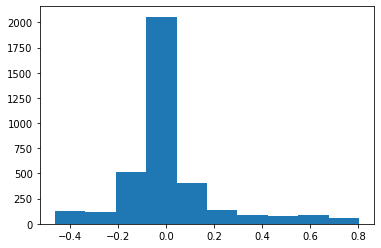

In [75]:
plt.hist(df_train_aug.comment_feat_1)

In [76]:
df_train.neighbourhood_cleansed.value_counts()

West Town                 422
Lake View                 336
Near North Side           284
Logan Square              268
Near West Side            181
Lincoln Park              174
Uptown                    126
Loop                      120
Lower West Side           114
Irving Park               107
Near South Side            94
Edgewater                  92
Bridgeport                 90
Rogers Park                83
North Center               81
Avondale                   77
Grand Boulevard            61
Lincoln Square             60
Hyde Park                  55
Humboldt Park              49
Portage Park               48
South Shore                47
East Garfield Park         46
West Ridge                 46
Woodlawn                   41
Albany Park                37
Armour Square              35
Douglas                    34
Austin                     31
Kenwood                    30
Mckinley Park              29
Greater Grand Crossing     25
South Lawndale             23
Jefferson 

In [77]:
df_train.comments.iloc[27]

'The apartment was cozy and had everything we needed.  Wifi worked well.  Good communication and detailed instructions.We had a great few days in Sarah\'s apartment. It was obvious that she had taken a lot of time and care to make it a lovely place to stay. The best bit was the beautiful garden out the back. Sarah was very organized and we were particularly grateful that she was so accomodating given that we booked at the last minute. Although she was out of town we had good communication and there were no problems. We would highly recommend this place and would also stay again next time we\'re in Chicago. I can\'t say enough how much I enjoyed my time at Sarah\'s place. She is a lovely lady and its obvious that she takes much pride and pleasure in creating a beautiful warm and welcoming place for her guests. The apartment is beautifully decorated very clean and comfortable. Location wise we couldn\'t have asked for a better neighborhood. Tons of great restaurants bars and shopping wit

In [78]:
df_train_aug.iloc[27,:]

id                                                                                         542067
listing_url                                                   https://www.airbnb.com/rooms/542067
scrape_id                                                                          20211215062239
last_scraped                                                                           2021-12-15
name                                                           Logan Square Modern Vintage Garden
description                                     This two-bedroom cozy ground-level flat with a...
neighborhood_overview                           The apartment is in Logan Square. It's one of ...
picture_url                                     https://a0.muscache.com/pictures/50800015/9d1f...
host_id                                                                                   2273840
host_url                                                https://www.airbnb.com/users/show/2273840
host_name           

In [79]:
vals27 = X_train.iloc[27]
vals27

bedrooms           2.000000
beds               3.000000
bathroom_num       1.000000
comment_feat_0     0.533599
comment_feat_1    -0.456392
comment_feat_2     0.587715
comment_feat_3     0.310815
comment_feat_4     0.111329
comment_feat_5    -0.082273
comment_feat_6     0.066556
comment_feat_7     0.031382
comment_feat_8    -0.038759
comment_feat_9     0.040948
West Town          0.000000
Lake View          0.000000
Near North Side    0.000000
Logan Square       1.000000
Near West Side     0.000000
Lincoln Park       0.000000
Uptown             0.000000
Loop               0.000000
Lower West Side    0.000000
Irving Park        0.000000
Edgewater          0.000000
Near South Side    0.000000
Bridgeport         0.000000
Avondale           0.000000
Rogers Park        0.000000
North Center       0.000000
Lincoln Square     0.000000
Grand Boulevard    0.000000
Hyde Park          0.000000
Humboldt Park      0.000000
Name: 27, dtype: float64

In [80]:
list(zip(feat_list, lr1.coef_)), lr1.intercept_

([('bedrooms', 29.112753244549094),
  ('beds', 17.191732064271907),
  ('bathroom_num', 26.832863376257027),
  ('comment_feat_0', -40.380632324642086),
  ('comment_feat_1', 49.44674224140558),
  ('comment_feat_2', 63.419918653414086),
  ('comment_feat_3', -96.13529402586018),
  ('comment_feat_4', 39.19078549273058),
  ('comment_feat_5', 23.642007839159554),
  ('comment_feat_6', 31.30404316528999),
  ('comment_feat_7', -60.608936766581934),
  ('comment_feat_8', 42.77489289582654),
  ('comment_feat_9', -13.157588127763768),
  ('West Town', 24.87271221841815),
  ('Lake View', 15.533446337386438),
  ('Near North Side', 70.85215935308011),
  ('Logan Square', 20.90312413019047),
  ('Near West Side', 25.774421505578708),
  ('Lincoln Park', 27.38252240037207),
  ('Uptown', 45.83357820153801),
  ('Loop', 79.62161019521942),
  ('Lower West Side', 20.156562882702758),
  ('Irving Park', -7.385923015270449),
  ('Edgewater', 10.209468420160608),
  ('Near South Side', 8.087901251240556),
  ('Bridgepor

In [81]:
vals27 * lr1.coef_

bedrooms           58.225506
beds               51.575196
bathroom_num       26.832863
comment_feat_0    -21.547048
comment_feat_1    -22.567085
comment_feat_2     37.272814
comment_feat_3    -29.880267
comment_feat_4      4.363087
comment_feat_5     -1.945096
comment_feat_6      2.083472
comment_feat_7     -1.902018
comment_feat_8     -1.657925
comment_feat_9     -0.538771
West Town           0.000000
Lake View           0.000000
Near North Side     0.000000
Logan Square       20.903124
Near West Side      0.000000
Lincoln Park        0.000000
Uptown              0.000000
Loop                0.000000
Lower West Side     0.000000
Irving Park        -0.000000
Edgewater           0.000000
Near South Side     0.000000
Bridgeport          0.000000
Avondale           -0.000000
Rogers Park         0.000000
North Center        0.000000
Lincoln Square      0.000000
Grand Boulevard     0.000000
Hyde Park           0.000000
Humboldt Park       0.000000
Name: 27, dtype: float64

In [82]:
np.sum(vals27 * lr1.coef_) + lr1.intercept_

141.6319455512488

In [83]:
y_train.iloc[27]

174.0

In [63]:
train_preds = lr1.predict(X_train)
test_preds = lr1.predict(X_test)

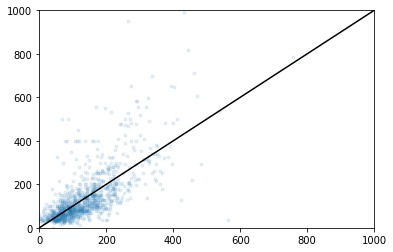

In [64]:
plt.scatter(test_preds, y_test, marker = '.', alpha=.1)
plt.xlim([0,1000])
plt.ylim([0,1000])
plt.plot([0,1000],[0,1000], color = 'k')

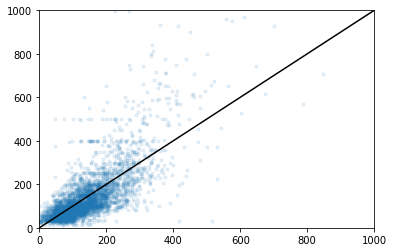

In [65]:
plt.scatter(train_preds, y_train, marker = '.', alpha=.1)
plt.xlim([0,1000])
plt.ylim([0,1000])
plt.plot([0,1000],[0,1000], color = 'k')

In [66]:
from sklearn.metrics import r2_score

In [67]:
r2_score(y_test, test_preds)

0.4893268817740497

In [68]:
r2_score(y_train, train_preds)

0.5336449953805487

In [86]:
import statsmodels.api as sm
from scipy import stats


X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())


                            OLS Regression Results                            
Dep. Variable:              price_num   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     129.0
Date:                Thu, 19 May 2022   Prob (F-statistic):               0.00
Time:                        16:18:54   Log-Likelihood:                -21291.
No. Observations:                3661   AIC:                         4.265e+04
Df Residuals:                    3627   BIC:                         4.286e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              20.4141      6.981     

(array([ 137.,  238., 1084., 1397.,  342.,  219.,   99.,   44.,   66.,
          35.]),
 array([-0.43971347, -0.31870715, -0.19770082, -0.0766945 ,  0.04431183,
         0.16531815,  0.28632448,  0.4073308 ,  0.52833713,  0.64934345,
         0.77034978]),
 <BarContainer object of 10 artists>)

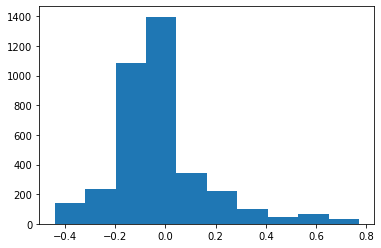

In [87]:
plt.hist(df_train_aug.comment_feat_2)